<a href="https://colab.research.google.com/github/jgomezpe/sgoal/blob/main/demo/python/WCCI2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GABO: Gene Analysis Base Optimization
This notebook contains the python code used for getting the results reported by J. Gomez and E. Leon in "GABO: Gene Analysis Base Optimization" 2022 IEEE Congress on Evolutionary Computation (CEC), Padua, Italy, 2022, pp. 1-8, doi: 10.1109/CEC55065.2022.9870237 (https://dl.acm.org/doi/10.1109/CEC55065.2022.9870237).


## Preliminars
To run scripts in this notebook, you must install sgoal package from the github repository by running the following cell:

In [1]:
!pip install git+https://github.com/jgomezpe/sgoal/

  Cloning https://github.com/jgomezpe/sgoal/ to /tmp/pip-req-build-xjsw8pm2
  Running command git clone --filter=blob:none --quiet https://github.com/jgomezpe/sgoal/ /tmp/pip-req-build-xjsw8pm2
  Resolved https://github.com/jgomezpe/sgoal/ to commit 0aa3c02908241a8731ced9d203801edd28068d98
  Preparing metadata (setup.py) ... done
  Created wheel for sgoal: filename=sgoal-1.0.0-py3-none-any.whl size=33422 sha256=f61fd59ab28ace939afa18acbf62c9eb524135f99bf9230b6c956007ec54ecd8
  Stored in directory: /tmp/pip-ephem-wheel-cache-m69cvyj_/wheels/09/42/f7/bd35d370e04658336a29af0773f97f7eb9820491a4920daf43
Successfully built sgoal


##Experiments
We can run $R$ times some SGoals on testbed bit array functions.

================= 120 =================
*************** Mixed ***************
SGOAL   SR      MAX       EVALS
GABO 0.1 267.07+/-8.85 7830.9+/-2424.31
RMHC 0.0 264.43+/-7.19 7786.3+/-2456.23
GS1 0.0 208.83+/-3.38 11445.4+/-1924.27
GSC1 0.0 210.1+/-3.03 11819.03+/-923.61
GGA 0.0 254.63+/-8.38 7963.67+/-2123.81
SSGA 0.0 259.83+/-9.0 7944.3+/-2213.67
CHAVELA 0.03 271.3+/-6.35 11421.2+/-637.19


<Axes: >

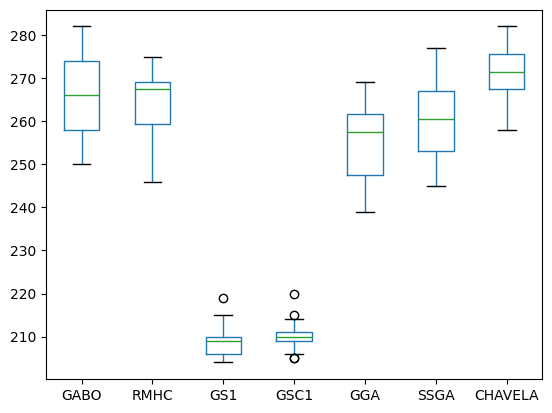

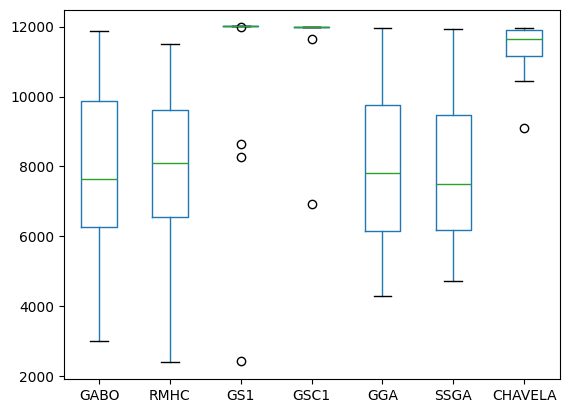

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sgoal.binary import Binary
from sgoal.binary import BinaryTestProblem
from sgoal.hc import BinaryHC
from sgoal.chavela import BinaryCHAVELA
from sgoal.ga import BinaryGGA
from sgoal.ga import BinarySSGA
from sgoal.gabo import GABO
from sgoal.hc import RMHC
from sgoal.gsc1 import GS1
from sgoal.gsc1 import GSC1
from sgoal.core import PROBLEM
from sgoal.core import run
from sgoal.core import experiment

# We format numbers to two decimal positions for presentation purposes
def round(x): return (int(100*x+0.5))/100

# We compute statistical information (average and standard deviation)
def stats(a):
  n = len(a)
  avg = sum(a)/n
  std = 0
  for y in a:
    std += (y-avg)**2
  std = (std/(n-1))**0.5
  return avg, std

# Paper reported values
def report(sgoal, fx, evals, sr):
  avg, std = stats(fx)
  avg, std = round(avg), round(std)
  avg_evals, std_evals = stats(evals)
  avg_evals, std_evals = round(avg_evals), round(std_evals)
  print(sgoal, ' ', round(sr), ' ', avg, '+/-', std, ' ', avg_evals, '+/-', std_evals, sep='')
  return sr, avg, std, avg_evals, std_evals

#Main program
# Search algorithm
sgoal = [GABO, RMHC, GS1, GSC1, BinaryGGA, BinarySSGA, BinaryCHAVELA]
sgoal_name = ['GABO', 'RMHC', 'GS1', 'GSC1', 'GGA', 'SSGA', 'CHAVELA']
name = ['MaxOnes','GD3','GBD4','RR1','Mixed']
F = 4 # Testing the Mixed function. Change the number accordingly
R = 30 # Number of experiments
D = 120 # Problem dimension (BitArray Length)
EVALS = 100*D # Maximum number of fitness evaluations

df = pd.DataFrame()
dfiter = pd.DataFrame()
print('=================', D, '=================')
print('***************', name[F], '***************')
print('SGOAL   SR      MAX       EVALS')
for i in range(len(sgoal)):
  problem = lambda : BinaryTestProblem(name[F], D, EVALS) # We will no trace additional information
  fx, evals, SR = experiment(sgoal[i], problem, R)
  report(sgoal_name[i], fx, evals, SR)
  df[sgoal_name[i]] = fx
  dfiter[sgoal_name[i]] = evals

myFig = plt.figure();
df.boxplot(grid=False)
myFig = plt.figure();
dfiter.boxplot(grid=False)